# 1 - Perkenalan


Nama : Taufit Hidayat Watan



Batch : 10

`Objective dari Milestone 2 ini adalah untuk mengevalusai pemelajaran terkait Machile Learning. Pada projcet Milestone 2 ini saya ingin membuat sebuah model yang mampu memprediksi apakah sebuah akun Instagram itu fake arau buka. Dataset yang saya gunakan bersumber dari https://www.kaggle.com/datasets/free4ever1/instagram-fake-spammer-genuine-accounts?select=train.csv.

# 2 - Import Librabries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
!pip install feature_engine
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import pickle

# 3 - Data Loading

In [3]:
data = pd.read_csv('/content/train.csv')

In [4]:
data

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [5]:
data['profile pic'].replace(0, 'Yes', inplace = True)
data['profile pic'].replace(1, 'No', inplace = True)

In [6]:
data['name==username'].replace(0, 'Yes', inplace = True)
data['name==username'].replace(1, 'No', inplace = True)

In [7]:
data['external URL'].replace(0, 'Yes', inplace = True)
data['external URL'].replace(1, 'No', inplace = True)

In [8]:
data['private'].replace(0, 'Yes', inplace = True)
data['private'].replace(1, 'No', inplace = True)

Pada bagian ini semua fitur yang berisi 0 dan 1 diubah menjadi YES dan NO, hal ini dilakukan karena pada model deployment nanti data yang dimasukan adalah string YES dan NO.

In [9]:
data

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,No,0.27,0,0.00,Yes,53,Yes,Yes,32,1000,955,0
1,No,0.00,2,0.00,Yes,44,Yes,Yes,286,2740,533,0
2,No,0.10,2,0.00,Yes,0,Yes,No,13,159,98,0
3,No,0.00,1,0.00,Yes,82,Yes,Yes,679,414,651,0
4,No,0.00,2,0.00,Yes,0,Yes,No,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,No,0.55,1,0.44,Yes,0,Yes,Yes,33,166,596,1
572,No,0.38,1,0.33,Yes,21,Yes,Yes,44,66,75,1
573,No,0.57,2,0.00,Yes,0,Yes,Yes,4,96,339,1
574,No,0.57,1,0.00,Yes,11,Yes,Yes,0,57,73,1


# 4 - Exploratory Data Analysis

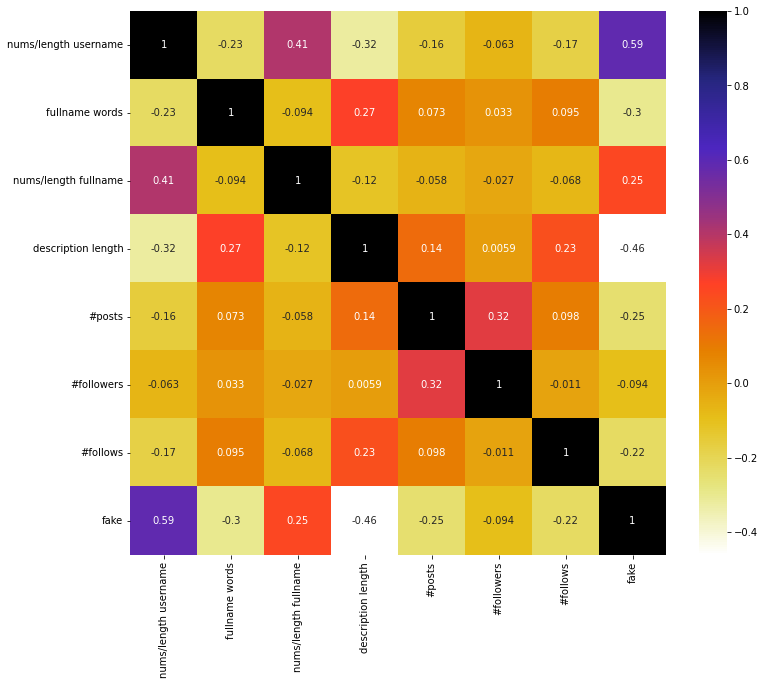

In [10]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

Pada bagian ini saya ingin melihat bagaimana korelasi antara fitur dengan target dan juga korelasi anta fitur dengan fitur, dimana dapat dilihat baik antra fitur dengan fitur ataupun fitur dengan target tidak memiliki korelasi yang tinggi.

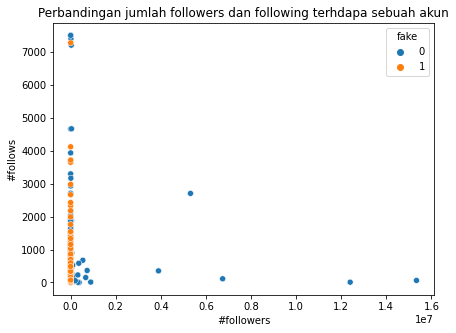

In [11]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 2)
sns.scatterplot(x = '#followers', y='#follows', data=data, hue='fake')
plt.title('Perbandingan jumlah followers dan following terhdapa sebuah akun')

plt.show()

Dari scatterplot diatas dapat dilihat bahwa semakin dikit followers dan semakin banyak jumlah following maka ada indikasi bahwa sebuah akun dapat dikatakan fake atau spammers.

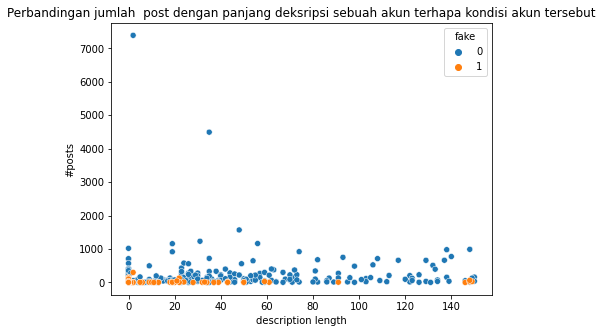

In [13]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 2)
sns.scatterplot(x = 'description length', y='#posts', data=data, hue='fake')
plt.title('Perbandingan jumlah  post dengan panjang deksripsi sebuah akun terhapa kondisi akun tersebut')

plt.show()

Dari scatterplot diatas dapat dilihat bahwa semakin pendek dksripsi sebuah akun ada indikasi bahwa akun dapat dikatakan fake atau spammers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


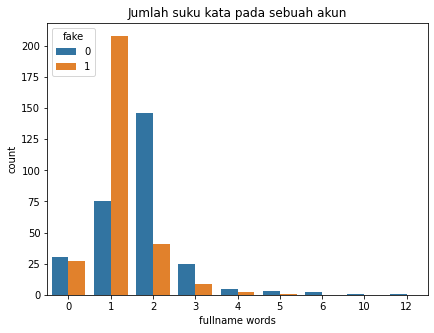

In [14]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,2)
sns.countplot(data['fullname words'], data=data, hue='fake')
plt.title('Jumlah suku kata pada sebuah akun')

plt.show()

Dari visualisasi diatas dapat dilihat akun dengan satu suku kata banyak yang fake ataupun spammers.

In [15]:
def plot_histplot(df, ft) :
    df.hist(column=[ft])
    plt.grid(False)
    plt.show()

Disini saya mendefenisikan fungsi untuk melihat bagaimana persebaran data pada fitur categorical, dari hasil plot ini nanti dapat ditentukan scaling yang akan dipakai nantinya. 

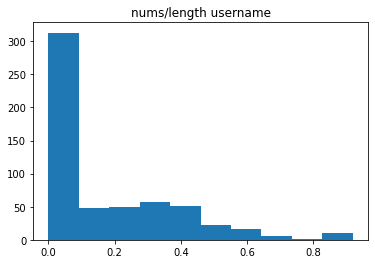

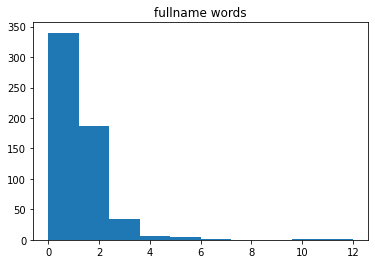

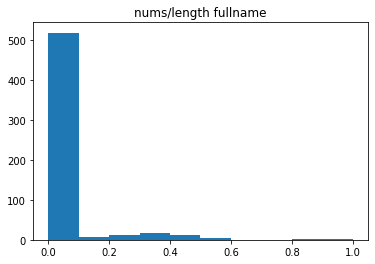

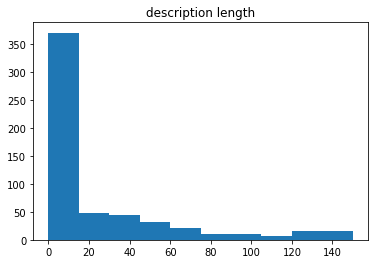

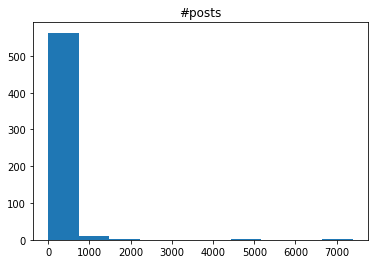

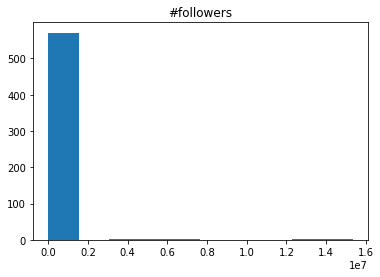

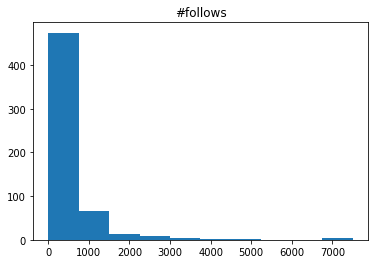

In [ ]:
plot_histplot(data, 'nums/length username')
plot_histplot(data, 'fullname words')
plot_histplot(data, 'nums/length fullname')
plot_histplot(data, 'description length')
plot_histplot(data, '#posts')
plot_histplot(data, '#followers')
plot_histplot(data, '#follows')

Hasilnya adalah semua data numerical punya distribus yang tidak normal, distribusinya skew kanan. Pada proses scaling nanti akan digunakan MinMaxScaller untuk melakukan normalisasi data.

# 5 - Data Preprocessing

In [16]:
X = data.drop('fake', axis=1)
y =data['fake']

Disini data dibagi menjadi X dan y, X untuk fitur dan y untuk target.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=19)

In [20]:
print('Train Size:' , X_train.shape)
print('Test Size:', X_test.shape)
print('Test Size:', y_train.shape)
print('Test Size:', y_test.shape)

Train Size: (460, 11)
Test Size: (116, 11)
Test Size: (460,)
Test Size: (116,)


Disini data dibagi menjadi train dan test dengan proporsi 80% untuk train dan 20% untuk test.

### Handling Ouliers

In [22]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

((X_train < (Q1 - 1.5 * IQR)) | (X_train > (Q3 + 1.5 * IQR))).sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


#followers              58
#follows                34
#posts                  58
description length      42
external URL             0
fake                     0
fullname words          12
name==username           0
nums/length fullname    47
nums/length username     7
private                  0
profile pic              0
dtype: int64

Dari hasil deteksi ouliers pada X_train dapat dilihat bahwa pada semua fitur numerical terdapat banyak ouliers.

In [23]:
((X_test < (Q1 - 1.5 * IQR)) | (X_test > (Q3 + 1.5 * IQR))).sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


#followers              17
#follows                 6
#posts                  19
description length      11
external URL             0
fake                     0
fullname words           3
name==username           0
nums/length fullname    11
nums/length username     5
private                  0
profile pic              0
dtype: int64

Pada X_test juga terdapat outliers.

In [24]:
cap = Winsorizer(capping_method='iqr', 
                          tail='both', 
                          fold=1.5,
                          variables=['#followers', '#follows', '#posts', 'description length', 'fullname words', 'nums/length fullname', 'nums/length username'],
                          missing_values='ignore')

cap.fit(X_train)

X_train_t = cap.transform(X_train)

Karena persebaran data numerical tidak normal, maka disini untuk handling outliers saya menggunakan Winsorizer, selain itu disini saya melakukan capping karena saya tidak ingin kehilangan data.

In [25]:
def plot_boxplot(df, ft) :
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

Disini saya mendefeniskan fungsi untuk melihat hasil capping outliers dalam bentuk boxplot.

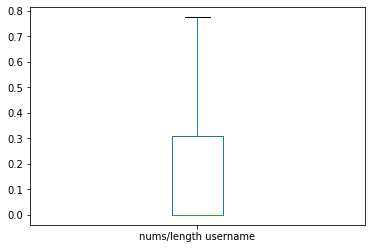

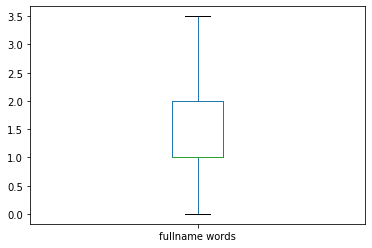

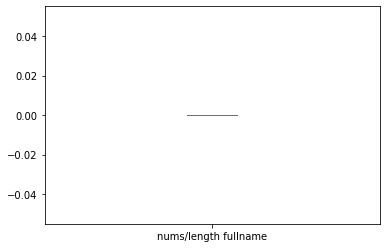

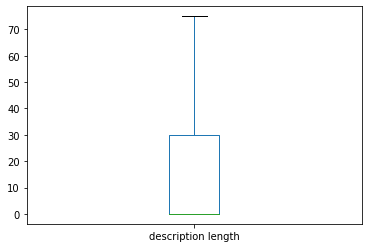

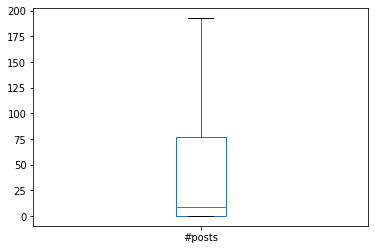

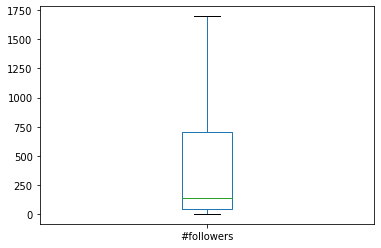

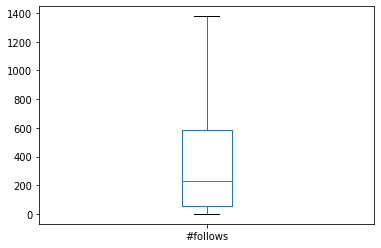

In [26]:
plot_boxplot(X_train_t, 'nums/length username')
plot_boxplot(X_train_t, 'fullname words')
plot_boxplot(X_train_t, 'nums/length fullname')
plot_boxplot(X_train_t, 'description length')
plot_boxplot(X_train_t, '#posts')
plot_boxplot(X_train_t, '#followers')
plot_boxplot(X_train_t, '#follows')

Setelah dilakuan capping, dapat dilihat pada boxplot tidak terdapat lagi outliers.

In [27]:
cap = Winsorizer(capping_method='iqr', 
                          tail='both', 
                          fold=1.5,
                          variables=['#followers', '#follows', '#posts', 'description length', 'fullname words', 'nums/length fullname', 'nums/length username'],
                          missing_values='ignore')

cap.fit(X_train)

X_test_t = cap.transform(X_test)

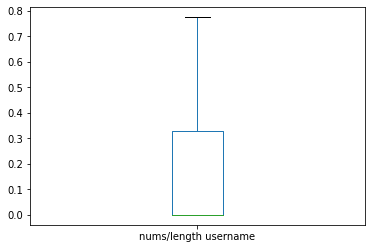

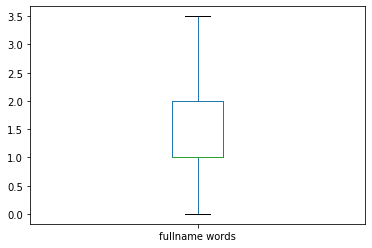

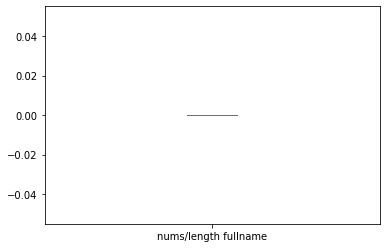

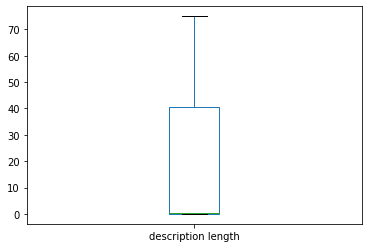

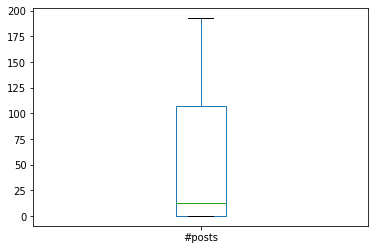

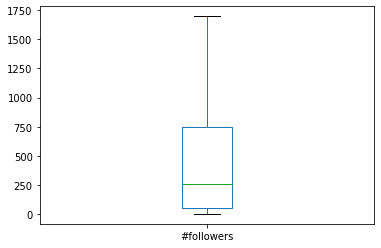

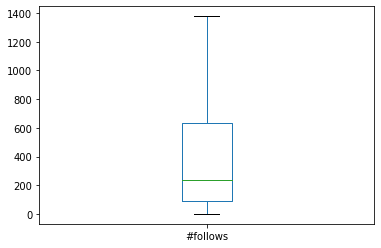

In [28]:
plot_boxplot(X_test_t, 'nums/length username')
plot_boxplot(X_test_t, 'fullname words')
plot_boxplot(X_test_t, 'nums/length fullname')
plot_boxplot(X_test_t, 'description length')
plot_boxplot(X_test_t, '#posts')
plot_boxplot(X_test_t, '#followers')
plot_boxplot(X_test_t, '#follows')

Pada X_test juga dilakukan handling yang sama dengan X_train.

## Handling Missing Values

In [29]:
X_train_t.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
dtype: int64

In [30]:
X_test_t.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
dtype: int64

In [31]:
y_train.isnull().sum()

0

In [32]:
y_test.isnull().sum()

0

Setelah dilakukan penegcekan missing values, ternyata tidak ada missing values baik pada data X maupun y.

## Feature Selection

In [33]:
X_train_cleaned = X_train_t.drop(['nums/length username', 'fullname words', 'nums/length fullname'], axis=1)
X_test_cleaned = X_test_t.drop(['nums/length username', 'fullname words', 'nums/length fullname'], axis=1)

Disini saya tidak akan memakai fitur 'nums/length username', 'fullname words'dan 'nums/length fullname'. Karena menurut saya jumlah suku kata ppada nama dan rasio nama tidak akan terlalu mempengaruhi sebuah akun fake atau tidak.

## Feature Scaling and Encoding

### Split numerical and categorical feature

In [34]:
num_columns = X_train_cleaned.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train_cleaned.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical COlumns :', cat_columns)

Numerical Columns :  ['description length', '#posts', '#followers', '#follows']
Categorical COlumns : ['profile pic', 'name==username', 'external URL', 'private']


In [35]:
X_train_num = X_train_cleaned[num_columns]
X_train_cat = X_train_cleaned[cat_columns]

X_test_num = X_test_cleaned[num_columns]
X_test_cat = X_test_cleaned[cat_columns]

Disini sebelum melakukan scaling dan encoding data akan dipisahkan dulu kedalam bentuk nuerical dan categorical.

### Scaling

In [36]:
scaler = MinMaxScaler()

scaler.fit(X_train_num)

X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[0.        , 0.        , 0.02708471, 0.00290355],
       [0.        , 0.        , 0.        , 0.61918156],
       [0.57333333, 0.00519481, 0.1560315 , 0.26930406],
       ...,
       [0.        , 0.        , 0.01943034, 0.00290355],
       [1.        , 1.        , 1.        , 0.56328827],
       [0.        , 0.15064935, 0.01471995, 0.02830959]])

Untuk scaling saya menggunakan MinMaxScaller karena persebaran data yang tidak normal karena MinMaxScaller m=bisa melakukan normalisasai data.

### Encoding

In [37]:
encoder = OneHotEncoder(handle_unknown = 'ignore')
X_train_cat_enc = encoder.fit_transform(X_train_cat).toarray()
X_test_cat_enc = encoder.transform(X_test_cat).toarray()

X_train_cat_enc

array([[0., 1., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 1., 0.]])

Untuk endocing saya menggunakan OneHOtEncoder karena data categorical bukan data yang bertingkat.

In [39]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_enc], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_enc], axis=1)

In [40]:
print(X_train_final.shape)
print(X_test_final.shape)

(460, 12)
(116, 12)


## PCA

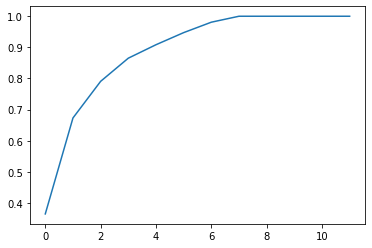

In [41]:
pca=PCA(whiten=True)
pca.fit(X_train_final)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.figure()
plt.plot(cumsum)

Disini saya juga melakukan PCA untuk mereduksi dimensi data dengan hasil dimensi terbaik adalah 3.

In [47]:
print(np.sum(pca.explained_variance_ratio_))
print(pca.n_components_)
print(np.sum(pca.explained_variance_ratio_))

1.0
12
1.0


Setelah dilakukan pengecekan ternya hasil terbaik memang 3.

In [48]:
X_train_pca=PCA(n_components=3).fit_transform(X_train_final)
X_test_pca=PCA(n_components=3).fit_transform(X_test_final)

In [49]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(460, 3)
(116, 3)


Dan hasilnya data pca dengan 3 dimensi.

# 6 - Model Defenition

Untuk model saya menggunakan SVM dan Random Forest Classifier, nantnya model terbaiklah yang akan digunakan.

## SVM Classifier

In [42]:
model_svc=SVC()

## Random Forest Classifier

In [43]:
model_rfc = RandomForestClassifier()

# 7 - Model Training

## SVM Classifier

In [44]:
model_svc.fit(X_train_final, y_train)
y_pred_svc=model_svc.predict(X_test_final)

## Random Forest Classifier 

In [45]:
model_rfc.fit(X_train_final, y_train)
y_pred_rfc=model_rfc.predict(X_test_final)

Disini model di train dengan data yang sudah di scaling dan di encoding.  

## SVM Classifier PCA

In [50]:
model_svc.fit(X_train_pca, y_train)
y_pred_svc_pca=model_svc.predict(X_test_pca)

## Random Forest Classifier PCA

In [51]:
model_rfc.fit(X_train_pca, y_train)
y_pred_rfc_pca=model_rfc.predict(X_test_pca)

Selain itu model juga di train dengan data yang sudah direduksi menggunakan PCA. 

# 8 - Model Evaluation

## SVM

In [52]:
print(accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

0.8706896551724138
              precision    recall  f1-score   support

           0       0.92      0.84      0.88        64
           1       0.82      0.90      0.86        52

    accuracy                           0.87       116
   macro avg       0.87      0.87      0.87       116
weighted avg       0.87      0.87      0.87       116



## SVM PCA

In [53]:
print(accuracy_score(y_test, y_pred_svc_pca))
print(classification_report(y_test, y_pred_svc_pca))

0.8017241379310345
              precision    recall  f1-score   support

           0       0.92      0.70      0.80        64
           1       0.72      0.92      0.81        52

    accuracy                           0.80       116
   macro avg       0.82      0.81      0.80       116
weighted avg       0.83      0.80      0.80       116



Untuk model SVM ternyata hasil evaluasi yang menggunakan classification report menunjukan bahwa model yang tidak menggunakan PCA memilki peforma yang lebih baik. 

## Random Forest Classifier

In [54]:
print(accuracy_score(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))

0.9137931034482759
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        64
           1       0.89      0.92      0.91        52

    accuracy                           0.91       116
   macro avg       0.91      0.91      0.91       116
weighted avg       0.91      0.91      0.91       116



## Random Forest Classifier PCA 

In [55]:
print(accuracy_score(y_test, y_pred_rfc_pca))
print(classification_report(y_test, y_pred_rfc_pca))

0.75
              precision    recall  f1-score   support

           0       0.91      0.61      0.73        64
           1       0.66      0.92      0.77        52

    accuracy                           0.75       116
   macro avg       0.78      0.77      0.75       116
weighted avg       0.80      0.75      0.75       116



Untuk model Random Forest Classifier, sama dengan SVM ternyata hasil evaluasi yang menggunakan classification report menunjukan bahwa model yang tidak menggunakan PCA memilki peforma yang lebih baik.

Dari kedua model yang telah di train, ternyata Random Forest Classifier adalah yang terbaik, maka Random Forest Classifier lah yang akan dideploy.

# 9 - Hyper Parameter Tuning

In [65]:
param_grid = [
    {'criterion':['gini', 'entropy'], 'max_depth':[4, 5, 19, 97, 100], 'n_estimators':[20, 40, 60, 80]}

  ]
rfc_class = RandomForestClassifier()

grid_search_rfc = GridSearchCV(rfc_class, param_grid, cv=10)
grid_search_rfc.fit(X_train_final, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [4, 5, 19, 97, 100],
                          'n_estimators': [20, 40, 60, 80]}])

Disini saya melakukan Hyper Parameter Tuning untuk mementukan parameter terbaik yang akan digunakan pada model Random Forest Classifier.

In [66]:
grid_search_rfc.best_params_

{'criterion': 'entropy', 'max_depth': 19, 'n_estimators': 40}

Dan hasil best parametrnya adalah 'criterion': 'entropy', 'max_depth': 19, 'n_estimators': 40

In [67]:
model_rfc_new = RandomForestClassifier(criterion='entropy', max_depth=19, n_estimators=40)
model_rfc_new.fit(X_train_final, y_train)
y_pred_rfc_new=model_rfc_new.predict(X_test_final)

Setelah itu model denga parameter terbaik di train dengan data.

In [64]:
print(accuracy_score(y_test, y_pred_rfc_new))
print(classification_report(y_test, y_pred_rfc_new))

0.8793103448275862
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        64
           1       0.88      0.85      0.86        52

    accuracy                           0.88       116
   macro avg       0.88      0.88      0.88       116
weighted avg       0.88      0.88      0.88       116



Dan hasilnya adalah ternyata model yang telah di tuning hasilnay tidak lebih baik dari pada model defalut hal ini dapat dilihat dengan membandinkan dengan peforma model default, oleh karena itu saya akan tetap menggunakan model default.

In [68]:
print(accuracy_score(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))

0.9137931034482759
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        64
           1       0.89      0.92      0.91        52

    accuracy                           0.91       116
   macro avg       0.91      0.91      0.91       116
weighted avg       0.91      0.91      0.91       116



# 10 - Model Inference

In [87]:
data_inf = data.sample(10, random_state=19)

In [88]:
inf_t = data_inf.drop(['nums/length username', 'fullname words', 'nums/length fullname', 'fake'], axis=1)

In [89]:
num_columns_inf = inf_t.select_dtypes(include=np.number).columns.tolist()
cat_columns_inf = inf_t.select_dtypes(include=['object']).columns.tolist()

In [90]:
data_inf_num = data_inf[num_columns_inf]
data_inf_cat = data_inf[cat_columns_inf]

In [91]:
scaler = MinMaxScaler()
scaler.fit(data_inf_num)
data_inf_num_scaled = scaler.transform(data_inf_num)

In [92]:
encoder_t = OneHotEncoder(handle_unknown = 'ignore')
encoder_t.fit(data_inf_cat)
data_inf_cat_enc = encoder_t.transform(data_inf_cat).toarray()

In [93]:
data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_enc], axis=1)

In [94]:
y_pred_inf = model_rfc_new.predict(data_inf_final)

In [95]:
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Fake Account - Predicrion'])
y_pred_inf_df

,Fake Account - Predicrion
0,1
1,1
2,1
3,1
4,0
5,1
6,1
7,1
8,1
9,1


In [96]:
print(data_inf['fake'])

437    1
257    0
373    1
394    1
184    0
157    0
362    1
232    0
561    1
304    1
Name: fake, dtype: int64


Disini saya juga melakuan model inference untuk melihat apakah model bisa bekerja dengan baik, dan hasilnya model dapat bekerja dengan baik.

# 11 - Pipeline

In [98]:
num_pipeline = make_pipeline(MinMaxScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])


In [99]:
final_pipeline = make_pipeline(data_pipeline, RandomForestClassifier())

Disini saya juga membuat pipeline agar model nantinya bisa di deploy.

In [100]:
final_pipeline.fit(X_train_cleaned, y_train)

y_pred = final_pipeline.predict(X_test_cleaned)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        64
           1       0.87      0.90      0.89        52

    accuracy                           0.90       116
   macro avg       0.89      0.90      0.90       116
weighted avg       0.90      0.90      0.90       116



Setlah itu juga dilakukan tes predict terhadap pipline dimana hasilnya agak sedikit turun dibanding dengan model dilaur pipline.

In [102]:
with open("pipeline.pkl", "wb") as model_file:
    pickle.dump(final_pipeline, model_file)

Terakhir pipeline di masukan kedalam file pipline.pkl dimana file inilah nanti yang akan di deploy ke heroku.

# 12 - Kesimpulan

Tujuan dari pengerjaan project ini adalah untuk membuat sebuah model yang mampu memprediksi apahak sebuah akun instrgam itu fake/spammers atau tidak. Dataset yang digunakan adalah dataset tentang akun - akun intragram. Dalam proses pengerjaannya dimulai dari load data, EDA, preporcessing, scalling dan encoding, PCA, model training, model evaluation, model dan terakhir piplelin. Beberapa ponit yang dapat diambil adalah sebagai berikut:
1. Data di buat kedalam dua bentuk yaitu data biasa dengan 12 dimensi dan data PCA dengan 3 dimensi.
2. Untuk model yang digunakan adalah SVM dan RAndom Forest Classifier.
3. Pada saat model training data biasa memiliki performa yang lebih baik dari data yang sudah di PCA, oleh karena itu data yang tetap akan digunakan adalah data biasa dengan 12 dimensi.
4. Untuk mmodel, Random Foresst Classifier memiliki perfroma yang lebih baik di bandingkan dengan SVM, oleh karena itu model yang akan dipakai adalah Random Forest.
5. Untuk hasil tuning pada model terbaik yaitu Random Forest, ternyata hasilnya tidak lebih baik jika dibangingkna dengan model Random Forest yang default.
6. Untuk pipe yang menggunakan model Rnadom FOrest default memiliki hasil yang sedikit turun jika di bandinkan dengan model default diluar pipeline, tetapi perbedaanny hanya sekitar 1%.